In [17]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

from keras import backend as K
K.set_image_dim_ordering('th')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.callbacks import ModelCheckpoint


In [22]:
PATH = os.getcwd()
# Define data path
data_path = PATH + '/data2'
data_dir_list = os.listdir(data_path)

img_rows=24
img_cols=24
num_channel=1
num_epoch=150

In [3]:
num_classes = 2

img_data_list=[]

In [4]:
for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:
		input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
		input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
		input_img_resize=cv2.resize(input_img,(24,24))
		img_data_list.append(input_img_resize)

Loaded the images of dataset-close eye

Loaded the images of dataset-open eye



In [5]:
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

(10000, 24, 24)


In [6]:
if num_channel==1:
	if K.image_dim_ordering()=='th':
		img_data= np.expand_dims(img_data, axis=1) 
		print (img_data.shape)
	else:
		img_data= np.expand_dims(img_data, axis=4) 
		print (img_data.shape)
		
else:
	if K.image_dim_ordering()=='th':
		img_data=np.rollaxis(img_data,3,1)
		print (img_data.shape)

(10000, 1, 24, 24)


In [7]:
# Define the number of classes
num_classes = 2

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:5000]=1
labels[5000:10000]=0

In [8]:
names = ['close eye','open eye']

In [9]:
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [10]:
input_shape=img_data[0].shape

In [19]:
print(input_shape)

(1, 24, 24)


In [20]:
model = Sequential()

model.add(Convolution2D(32, 3,3,border_mode='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(128, 3, 3))
model.add(Activation('relu'))
#model.add(Convolution2D(64, 3, 3))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('sigmoid'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])
model.compile(loss='binary_crossentropy',optimizer= adam(lr=0.001),metrics=["accuracy"])

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(1, 24, 24..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3))`
  if __name__ == '__main__':


In [21]:
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [24]:
hist = model.fit(X_train, y_train, batch_size=16, nb_epoch=num_epoch, callbacks=callbacks_list, verbose=1, validation_data=(X_test, y_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/150
  64/8000 [..............................] - ETA: 24s - loss: 0.0421 - acc: 0.9688

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


8000/8000 [==============================] - 29s 4ms/step - loss: 0.0050 - acc: 0.9987 - val_loss: 0.0045 - val_acc: 0.9985

Epoch 00001: val_acc improved from -inf to 0.99850, saving model to weights.best.hdf5
Epoch 2/150
8000/8000 [==============================] - 35s 4ms/step - loss: 0.0020 - acc: 0.9994 - val_loss: 0.0179 - val_acc: 0.9980

Epoch 00002: val_acc did not improve from 0.99850
Epoch 3/150
8000/8000 [==============================] - 34s 4ms/step - loss: 0.0103 - acc: 0.9968 - val_loss: 0.0065 - val_acc: 0.9990

Epoch 00003: val_acc improved from 0.99850 to 0.99900, saving model to weights.best.hdf5
Epoch 4/150
8000/8000 [==============================] - 34s 4ms/step - loss: 5.0326e-04 - acc: 0.9999 - val_loss: 0.0061 - val_acc: 0.9990

Epoch 00004: val_acc did not improve from 0.99900
Epoch 5/150
8000/8000 [==============================] - 34s 4ms/step - loss: 0.0052 - acc: 0.9979 - val_loss: 0.0138 - val_acc: 0.9955

Epoch 00005: val_acc did not improve from 0.9990

8000/8000 [==============================] - 36s 5ms/step - loss: 0.0045 - acc: 0.9985 - val_loss: 0.0066 - val_acc: 0.9980

Epoch 00044: val_acc did not improve from 0.99900
Epoch 45/150
8000/8000 [==============================] - 39s 5ms/step - loss: 0.0019 - acc: 0.9994 - val_loss: 0.0056 - val_acc: 0.9995

Epoch 00045: val_acc improved from 0.99900 to 0.99950, saving model to weights.best.hdf5
Epoch 46/150
8000/8000 [==============================] - 37s 5ms/step - loss: 6.3412e-04 - acc: 0.9998 - val_loss: 0.0071 - val_acc: 0.9990

Epoch 00046: val_acc did not improve from 0.99950
Epoch 47/150
8000/8000 [==============================] - 32s 4ms/step - loss: 0.0036 - acc: 0.9994 - val_loss: 0.0017 - val_acc: 0.9995

Epoch 00047: val_acc did not improve from 0.99950
Epoch 48/150
8000/8000 [==============================] - 33s 4ms/step - loss: 6.9371e-04 - acc: 0.9997 - val_loss: 0.0022 - val_acc: 0.9990

Epoch 00048: val_acc did not improve from 0.99950
Epoch 49/150
8000/8000 [==

8000/8000 [==============================] - 32s 4ms/step - loss: 7.9537e-04 - acc: 0.9997 - val_loss: 0.0032 - val_acc: 0.9985

Epoch 00087: val_acc did not improve from 0.99950
Epoch 88/150
8000/8000 [==============================] - 32s 4ms/step - loss: 0.0018 - acc: 0.9991 - val_loss: 0.0041 - val_acc: 0.9990

Epoch 00088: val_acc did not improve from 0.99950
Epoch 89/150
8000/8000 [==============================] - 32s 4ms/step - loss: 6.6878e-04 - acc: 0.9996 - val_loss: 0.0061 - val_acc: 0.9988

Epoch 00089: val_acc did not improve from 0.99950
Epoch 90/150
8000/8000 [==============================] - 33s 4ms/step - loss: 3.1019e-05 - acc: 1.0000 - val_loss: 0.0067 - val_acc: 0.9990

Epoch 00090: val_acc did not improve from 0.99950
Epoch 91/150
8000/8000 [==============================] - 32s 4ms/step - loss: 3.2080e-05 - acc: 1.0000 - val_loss: 0.0087 - val_acc: 0.9990

Epoch 00091: val_acc did not improve from 0.99950
Epoch 92/150
8000/8000 [==============================] -


Epoch 00129: val_acc did not improve from 1.00000
Epoch 130/150
8000/8000 [==============================] - 30s 4ms/step - loss: 0.0029 - acc: 0.9988 - val_loss: 0.0123 - val_acc: 0.9980

Epoch 00130: val_acc did not improve from 1.00000
Epoch 131/150
8000/8000 [==============================] - 30s 4ms/step - loss: 0.0041 - acc: 0.9990 - val_loss: 0.0070 - val_acc: 0.9980

Epoch 00131: val_acc did not improve from 1.00000
Epoch 132/150
8000/8000 [==============================] - 33s 4ms/step - loss: 4.3768e-04 - acc: 0.9998 - val_loss: 0.0098 - val_acc: 0.9985

Epoch 00132: val_acc did not improve from 1.00000
Epoch 133/150
8000/8000 [==============================] - 34s 4ms/step - loss: 6.4606e-04 - acc: 0.9999 - val_loss: 0.0105 - val_acc: 0.9985

Epoch 00133: val_acc did not improve from 1.00000
Epoch 134/150
8000/8000 [==============================] - 32s 4ms/step - loss: 0.0024 - acc: 0.9993 - val_loss: 0.0083 - val_acc: 0.9985

Epoch 00134: val_acc did not improve from 1.00

In [14]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(num_epoch)

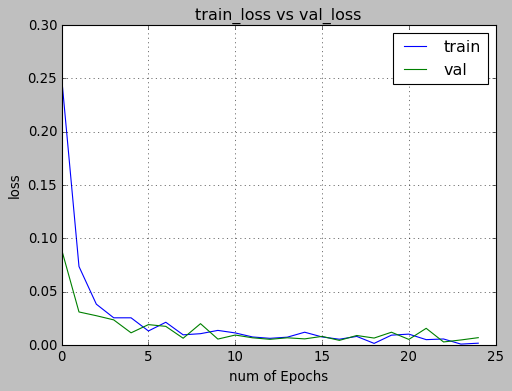

In [16]:
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
plt.savefig('8th_attempt_loss.png')